# Training example: SEAS benchmark BP3-QD

Created by Duo Li (dli@geophysik.uni-muenchen.de) and Yajing Liu (yajing.liu@mcgill.ca) 
June 30, 2022

## Target

Sequences of Earthquakes and Aseismic Slip (SEAS) models focus on smaller, regional-scale fault zones
with the goal of understanding what physical factors control observations of slow slip, microseismicity, the initiation, rupture, magnitudes, and recurrence intervals of large earthquakes, as well as ground shaking and aseismic movement.

## Discription

BP3-QD considers a planar, dipping fault embedded in a homogeneous, linear elastic
half-space with a free surface where motion is plane-strain. The fault is governed by rate-and-state friction
down dip to a distance Wf and creeps at an imposed constant rate Vp down to the in nite dip distance.
The simulations will include the nucleation, propagation, and arrest of quasi-dynamic (BP3-QD) and fully-
dynamic (BP3-FD) earthquakes, and aseismic slip in the post- and inter-seismic periods. The left and right
sides of the fault are labeled with - and +, respectively.

<img src="bp3-disp.png" alt="drawing" width="600"/>
<!-- ![image](bp3-disp.png) -->


## Method (Boundary element method)


## Model setup

We list the key parameters in Table 1. 

<img src="bp3-table.png" alt="drawing" width="600"/>

In [41]:
# example 1: calculate stiffness for a 60 dipping thrust-slip fault
# read geometry and mesh file: fault_bp3_h100_D60.gts
# num_nodes=1202, num_eles=1200

!mpirun -n 2 calc_stiffness

# after a few minutes you will get some binary files in stiffness/

/bin/bash: mpirun: command not found


In [ ]:
# exercise 1:simulate earthquake cycles on the 60-dipping thrust fault
!mpirun -n 2 tribie parameter_bp3_h100_D60_L60.txt

# after several minutes you will get some files in output/ 

In [42]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
print('load modulus')

load modulus


In [77]:
# load data of coseismic slip along the downdip distance

slpfile='output/slip-BP3_h100_D60_L60.dat'
dp_pos = np.loadtxt(slpfile,comments='#',skiprows=15,max_rows=1)
time_series = np.loadtxt(slpfile,comments='#',skiprows=15+1)

<IPython.core.display.Javascript object>


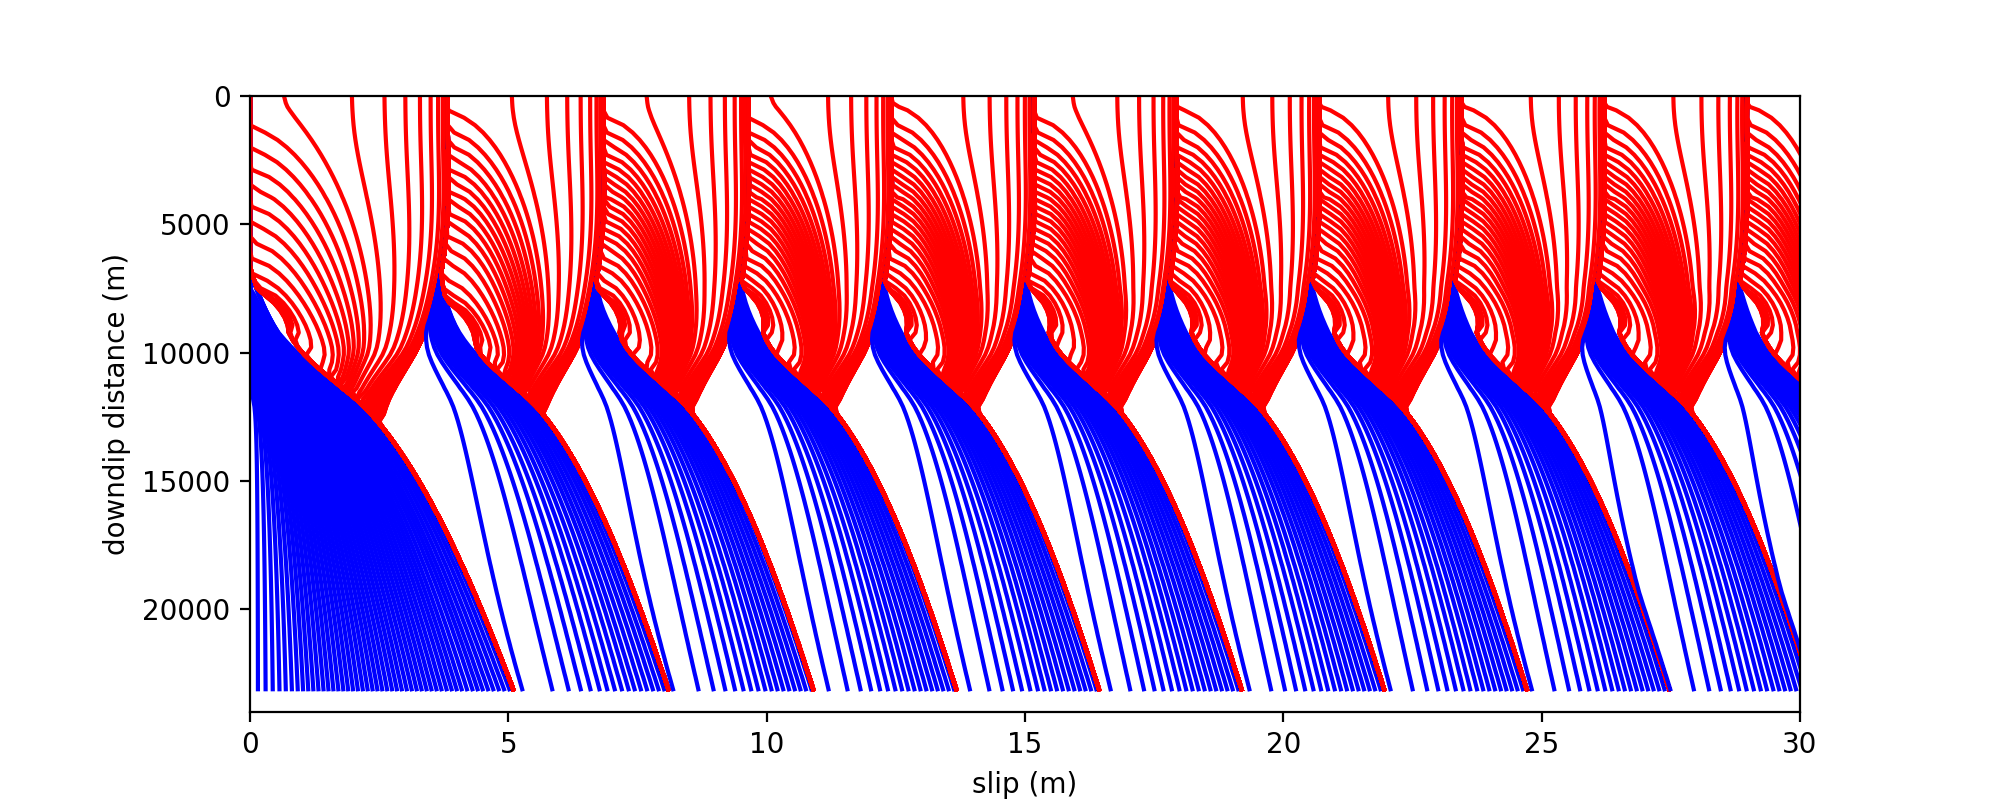

Text(0, 0.5, 'downdip distance (m)')

In [71]:
yrs = 365*24*3600
it_cos = 0.0
it_int = 0.0

## plot coseismic (red) and interseismic (blue) slip along downdip distance.
fig,ax11 = plt.subplots(nrows=1,ncols=1,figsize=(10,4))

for it in range(len(time_series[:,1])):
    if(time_series[it,1]>-3.0 ):
        if(time_series[it,0]-it_cos > 1.0):
            ax11.plot(time_series[it,2:83],dp_pos[2:83],'-r')
            it_cos = time_series[it,0] 
    else:
        if(time_series[it,0]-it_int > 5*yrs ):
            ax11.plot(time_series[it,2:83],dp_pos[2:83],'-b')
            it_int = time_series[it,0]
    
ax11.set_xlim([0,30])
ax11.set_ylim([0,24000])
ax11.invert_yaxis()
ax11.set_xlabel('slip (m)')
ax11.set_ylabel('downdip distance (m)')

<IPython.core.display.Javascript object>


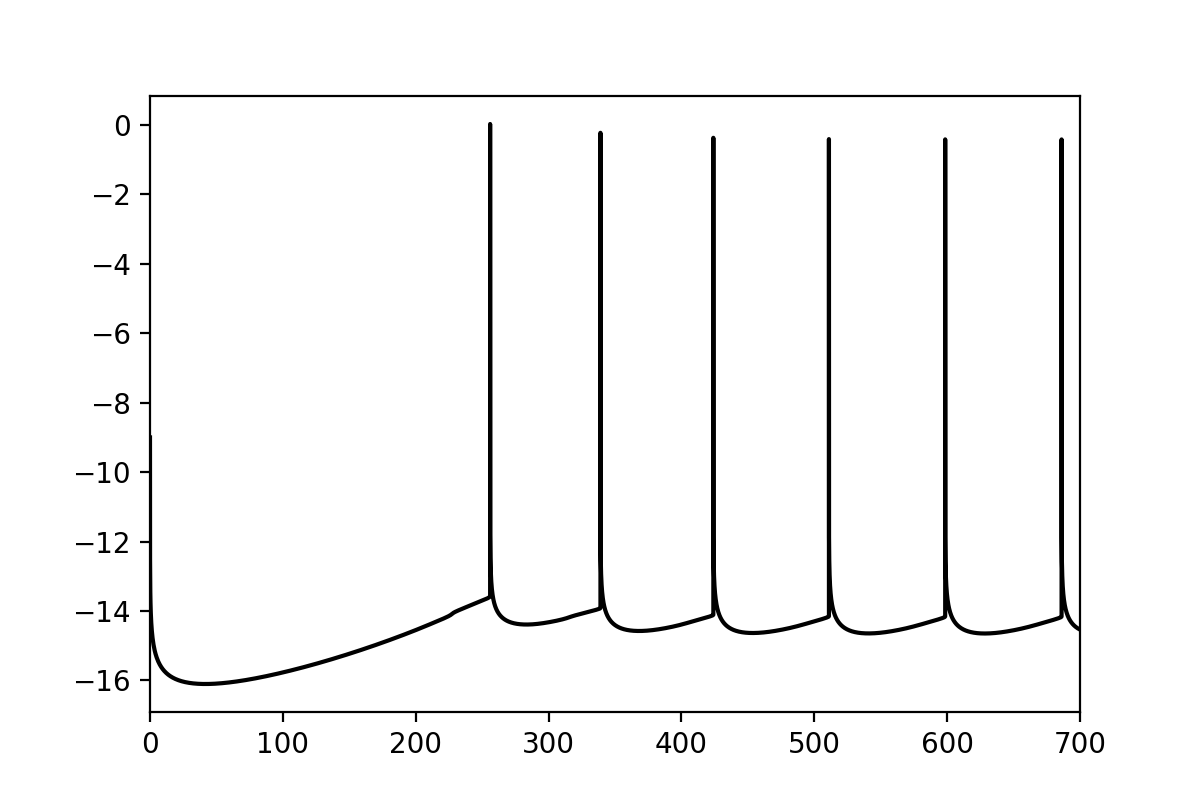

(0.0, 700.0)

In [85]:
# plot maximum slip rate on the fault

sr_file = 'output/fltst_dp075-BP3_h100_D60_L60.dat'
sr_data = np.loadtxt(sr_file,comments='#',skiprows=19)

fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(6,4))
ax1.plot(sr_data[:,0]/yrs,sr_data[:,2],'-k')
ax1.set_xlim([0,700])

In [ ]:
# exercise 1
# load series data of shear stress along the downdip distance and plot

stressfile='.../...'
dp_pos = np.loadtxt(slpfile,comments='#',skiprows=15,max_rows=1)
dp_pos = np.loadtxt(slpfile,comments='#',skiprows=15,max_rows=1)
time_series = np.loadtxt(slpfile,comments='#',skiprows=15+1)

In [ ]:
# exercise 2


In [ ]:
# exercise 3
# simulate subduction fault at 30 dipping angle and plot the results

# step 1. create mesh file

# step 2. calculate stiffness

# step 3. change parameter input file.

# step 4. simulate

# step 5 .....